In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '../resource/CCGENERAL.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.drop(columns=['CUST_ID', 'TENURE'], inplace=True)
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

In [5]:
missing = df.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [6]:
df.fillna(df.median(), inplace=True)
missing = df.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [7]:
values = Normalizer().fit_transform(df.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [8]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [9]:
labels = kmeans.labels_
silhouete = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouete)
# Silhoute varia de [-1, 1]

0.36432771559983473


In [10]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)
# Davies_bouldin quanto menor melhor

1.0766554893638944


In [11]:
kalinsk = metrics.calinski_harabasz_score(values, labels)
print(kalinsk)

3431.6263035304455


In [12]:
def clustergin_algoritm(n_cluster, df):
    kmeans = KMeans(n_clusters=n_cluster, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(df)
    s = metrics.silhouette_score(df, labels, metric='euclidean')
    dvb = metrics.davies_bouldin_score(df, labels)
    calinski = metrics.calinski_harabasz_score(df, labels)
    return s, dvb, calinski
    

In [13]:
s1, dvb1, calinski1 = clustergin_algoritm(3, values)
print(s1, dvb1, calinski1)

0.3272400959825509 1.3091331308568723 3526.4627280881555


In [14]:
s2, dvb2, calinski2 = clustergin_algoritm(5, values)
print(s2, dvb2, calinski2)

0.3644845919974304 1.075713859061329 3431.79374284143


In [15]:
s3, dvb3, calinski3 = clustergin_algoritm(50, values)
print(s3, dvb3, calinski3)

0.2533789585339323 1.2185627654995361 1625.8692793011692


In [16]:
df.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [17]:
random_data = np.random.rand(8950, 16)
sr, dvbr, calinskir = clustergin_algoritm(5, random_data)
print(sr, dvbr, calinskir)
print(s2, dvb2, calinski2)

0.03987557060811194 3.494222400789483 303.26976514404726
0.3644845919974304 1.075713859061329 3431.79374284143


In [18]:
set1, set2, set3 = np.array_split(values, 3)
s_set1, dvb_set1, cal_set1 = clustergin_algoritm(5, set1)
s_set2, dvb_set2, cal_set2 = clustergin_algoritm(5, set2)
s_set3, dvb_set3, cal_set3 = clustergin_algoritm(5, set3)
print(s_set1, dvb_set1, cal_set1)
print(s_set2, dvb_set2, cal_set2)
print(s_set3, dvb_set3, cal_set3)

0.368927607326675 1.0558332597484905 1204.1009094357971
0.35416642754504823 1.1382306445993162 1194.9519865048883
0.3617903683784798 1.152437697163841 1159.0068187799507


<function matplotlib.pyplot.show(close=None, block=None)>

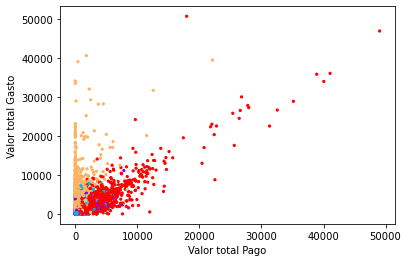

In [19]:
plt.scatter(df['PURCHASES'], df['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Valor total Pago')
plt.ylabel('Valor total Gasto')
plt.show

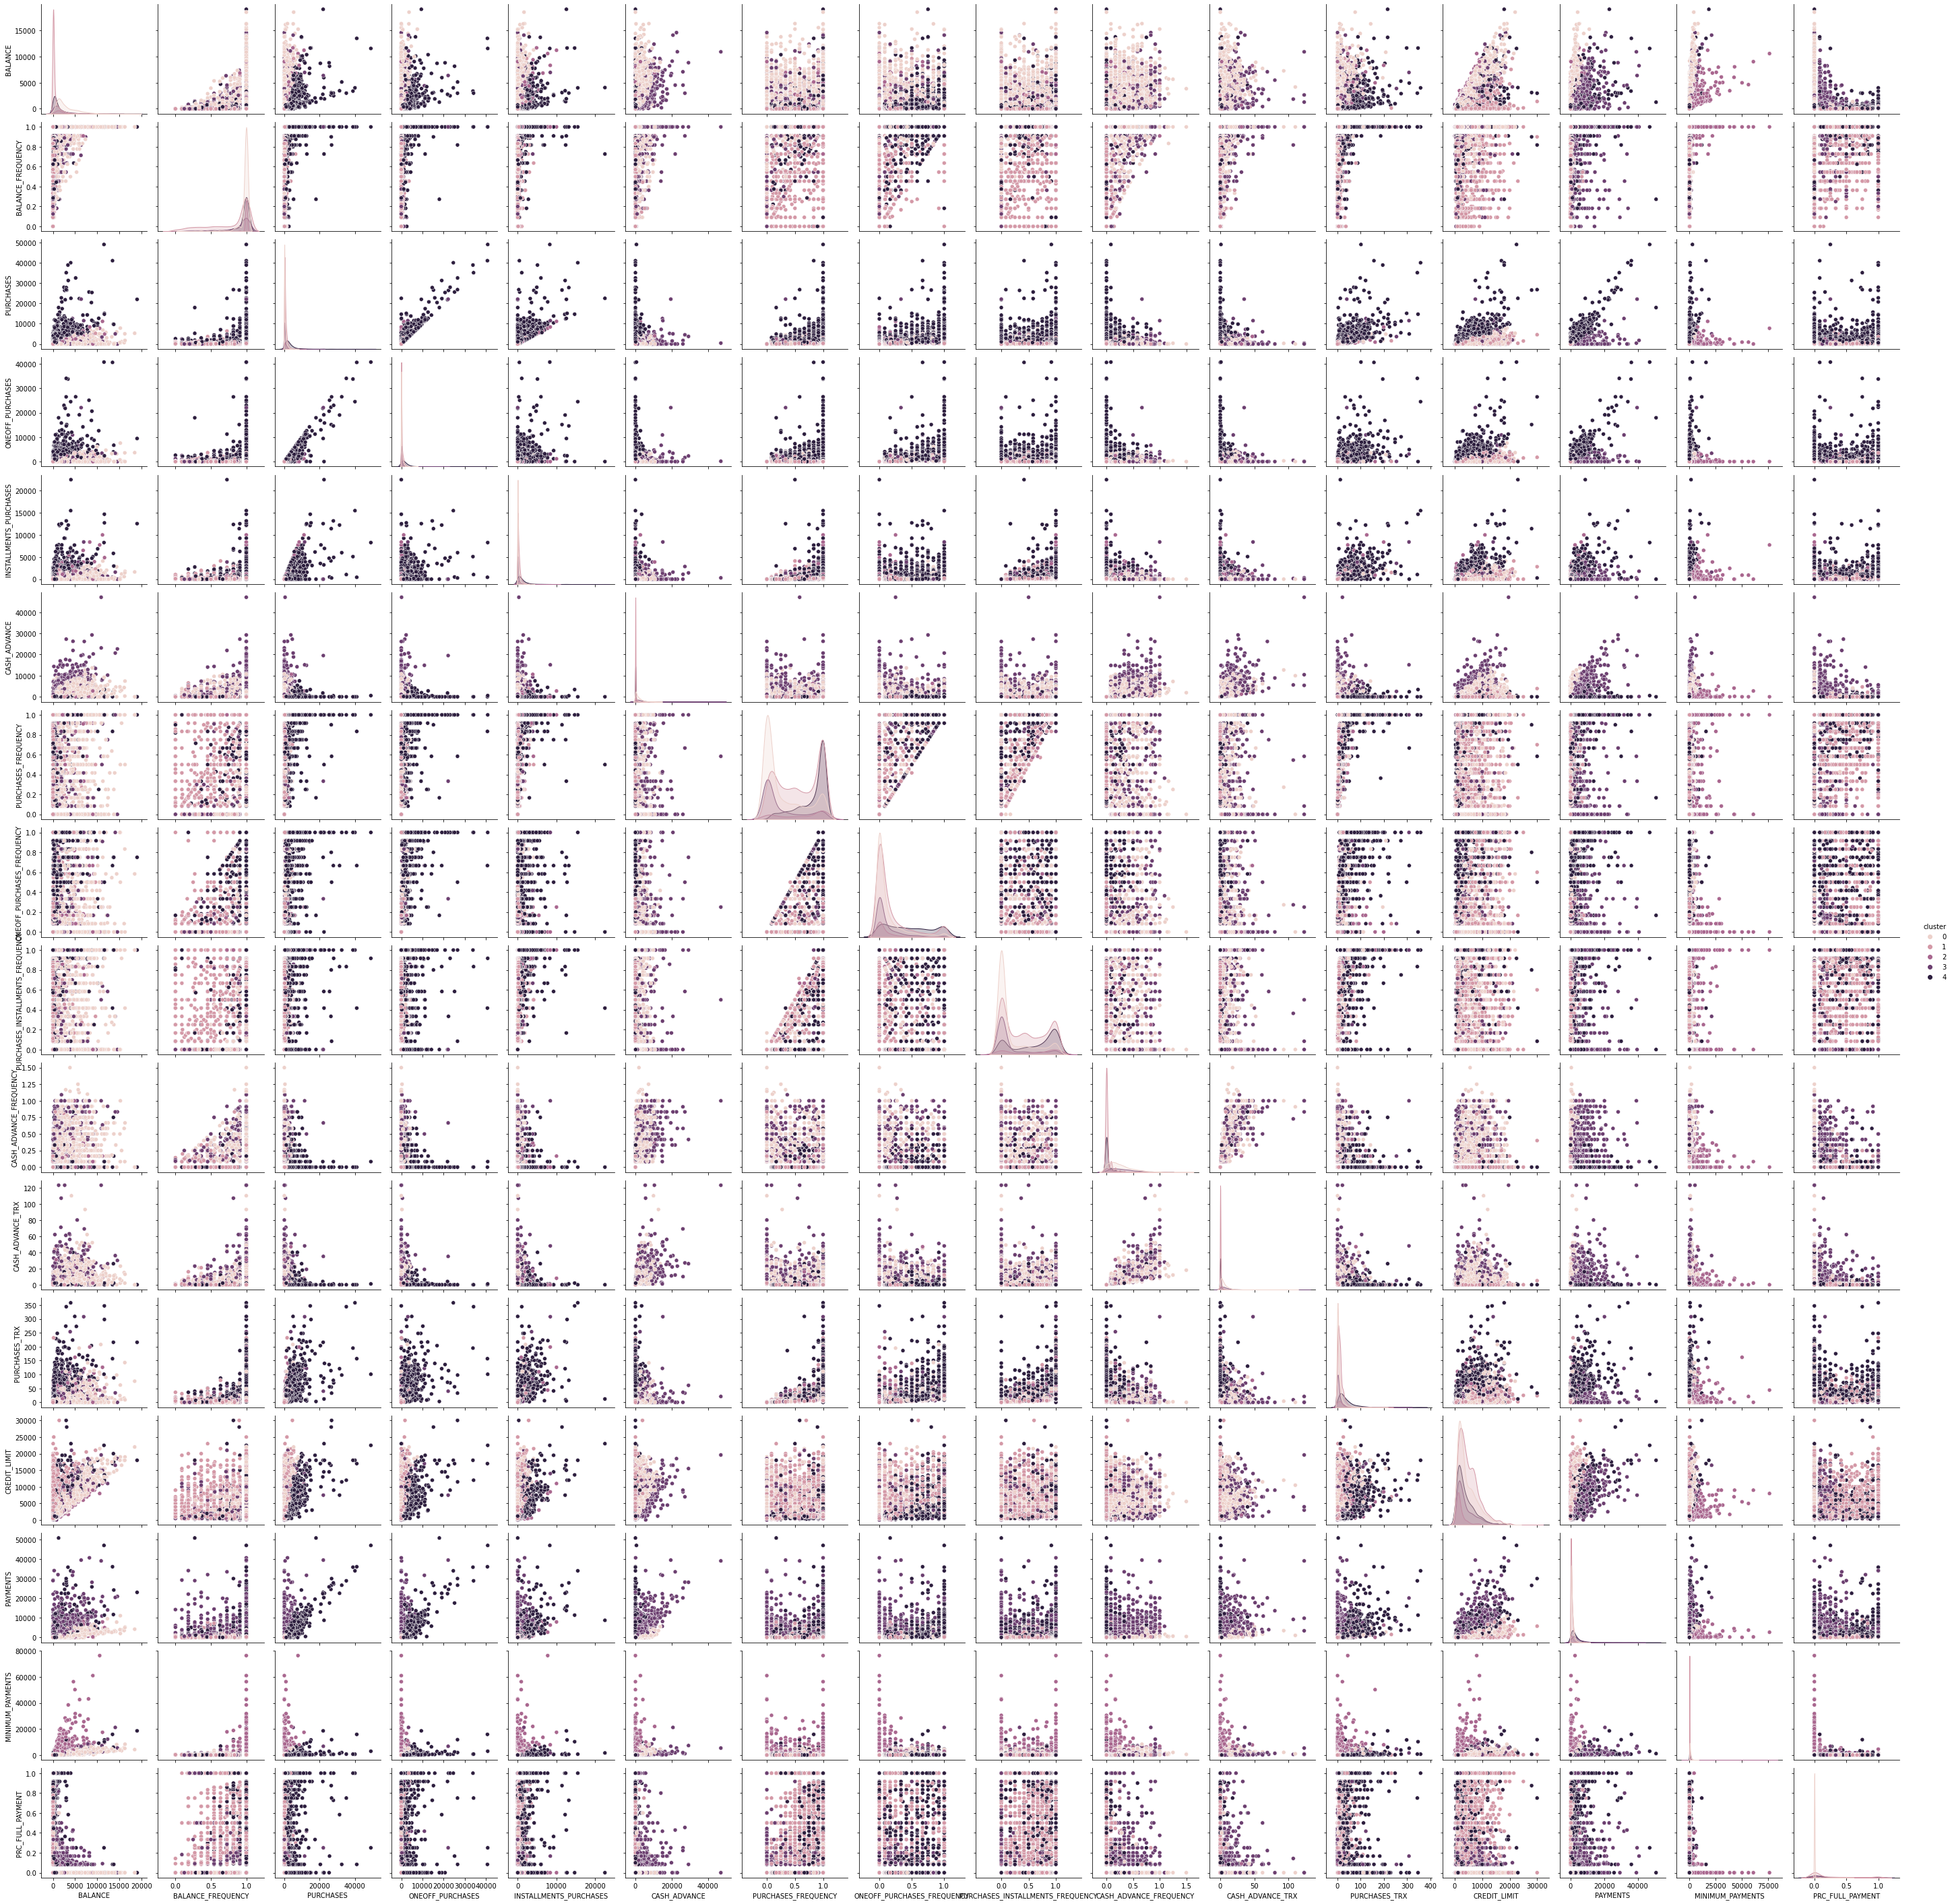

In [20]:
df['cluster'] = labels
sns.pairplot(df[0:], hue='cluster')

In [21]:
df.groupby['cluster'].describe()

TypeError: 'method' object is not subscriptable

In [22]:
centroids = kmeans.cluster_centers_
print(centroids)

[[5.05609427e-01 2.72458281e-04 6.20443118e-02 3.64132867e-02
  2.56528453e-02 2.50983242e-01 6.76500977e-05 2.58736481e-05
  4.52459745e-05 5.72596118e-05 1.14931278e-03 1.33817947e-03
  7.19303174e-01 1.65948580e-01 1.79637726e-01 5.35020961e-07]
 [6.91050301e-02 2.30636540e-04 1.21661074e-01 4.82318564e-02
  7.35307007e-02 2.45645897e-02 1.72663387e-04 3.36808201e-05
  1.40117113e-04 7.94455501e-06 1.25030304e-04 2.86106180e-03
  9.43407386e-01 1.53821597e-01 5.68812550e-02 7.60420187e-05]
 [3.32317274e-01 2.68236835e-04 1.58133776e-01 3.59019793e-02
  1.22617407e-01 5.84980464e-02 1.66530260e-04 2.59274074e-05
  1.47421878e-04 1.93688828e-05 4.28978579e-04 3.86213412e-03
  3.76207305e-01 2.52034923e-01 6.80863553e-01 4.25027950e-06]
 [2.36124168e-01 2.16953274e-04 5.91149936e-02 3.36454157e-02
  2.54747539e-02 4.03912738e-01 5.17701963e-05 2.02718096e-05
  3.43758681e-05 6.59285412e-05 1.58403309e-03 1.09878892e-03
  5.37349935e-01 5.92823002e-01 1.04825799e-01 2.74586220e-05]
 [1.

In [24]:
max = len(centroids[0])
for i in range(max):
    print(df.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0225
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0228
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0275
MINIMUM_PAYMENTS 
0.0544
PRC_FULL_PAYMENT 
0.0000


<function matplotlib.pyplot.show(close=None, block=None)>

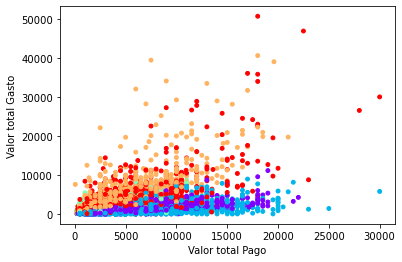

In [28]:
plt.scatter(df['CREDIT_LIMIT'], df['PAYMENTS'], c=labels, s=15, cmap='rainbow')
plt.xlabel('Valor total Pago')
plt.ylabel('Valor total Gasto')
plt.show

In [31]:
dataframe = df[['cluster', 'BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']]


In [32]:
st, dvbt, calinskit = clustergin_algoritm(5, values)
print(st, dvbt, calinskit)

0.3643408978617169 1.07649164527872 3431.6350169801926


In [40]:
description = dataframe.groupby('cluster').describe()
print(description.mean())

BALANCE       count     1790.000000
              mean      1683.595454
              std       1765.214324
              min         15.523803
              25%        606.036737
              50%       1049.972961
              75%       2097.641612
              max      14684.140735
PURCHASES     count     1790.000000
              mean      1121.848492
              std       1605.279321
              min         20.196000
              25%        286.207500
              50%        618.215000
              75%       1337.299500
              max      19304.018000
CASH_ADVANCE  count     1790.000000
              mean      1132.510016
              std       1610.404179
              min          0.000000
              25%        212.198497
              50%        594.325205
              75%       1412.906400
              max      17098.362693
CREDIT_LIMIT  count     1790.000000
              mean      3987.273896
              std       3287.821305
              min        180